# Edge and line detection

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import math

dataDir = './data'

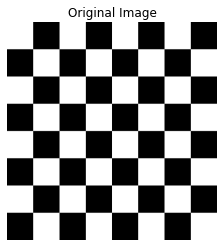

In [2]:
# Opening an image
img = cv2.imread(os.path.join(dataDir, 'chessboard_01.jpg'), 0)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

## Edge Detection

[Sobel Filter](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d)

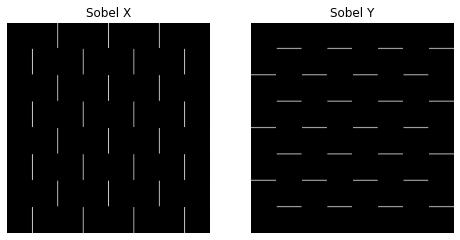

In [3]:
# Apply a Gaussian blur filter before using the Sobel filter
imgBlur = cv2.GaussianBlur(img, (31,31), 0) # Try with sizes 3x3, 7x7, 11x11, 31x31

# Using a Sobel Filter
imgWithSobelX = cv2.Sobel(imgBlur, cv2.CV_64F, 1, 0, ksize=5) # Also try with a kernel size of 1, 3, 7
imgWithSobelY = cv2.Sobel(imgBlur, cv2.CV_64F, 0, 1, ksize=5) # Also try with a kernel size of 1, 3, 7

fig, ax = plt.subplots(1,2,figsize=(8,6))

ax[0].imshow(imgWithSobelX, cmap='gray', vmin=0)
ax[0].set_title('Sobel X')
ax[0].axis('off')

ax[1].imshow(imgWithSobelY, cmap = 'gray', vmin=0)
ax[1].set_title('Sobel Y')
ax[1].axis('off')

plt.show()

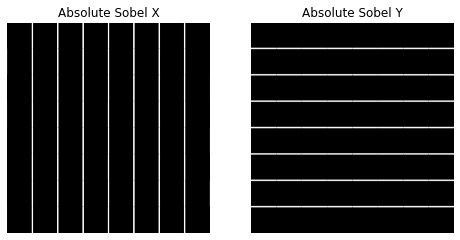

In [4]:
abs_sobel_x = cv2.convertScaleAbs(imgWithSobelX)
abs_sobel_y = cv2.convertScaleAbs(imgWithSobelY)

fig, ax = plt.subplots(1,2,figsize=(8,6))

ax[0].imshow(abs_sobel_x, cmap='gray', vmin=0)
ax[0].set_title('Absolute Sobel X')
ax[0].axis('off')

ax[1].imshow(abs_sobel_y, cmap = 'gray', vmin=0)
ax[1].set_title('Absolute Sobel Y')
ax[1].axis('off')

plt.show()

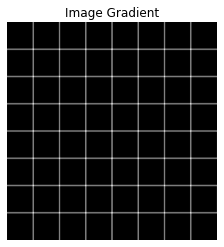

In [5]:
grad = cv2.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)

plt.imshow(grad, cmap='gray', vmin=0)
plt.title('Image Gradient')
plt.axis('off')
plt.show()

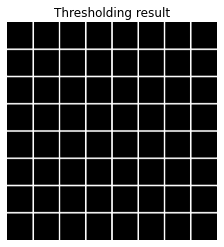

In [6]:
window_name = 'Thresholding Gradient Image'
dst = grad

def Threshold_Demo(val):
    global dst
    threshold_type = cv2.THRESH_BINARY # Other: cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV
    threshold_value = cv2.getTrackbarPos('Value', window_name)
    _, dst = cv2.threshold(grad, threshold_value, 255, cv2.THRESH_BINARY)
    cv2.imshow(window_name, dst)

# Open the window
cv2.namedWindow(window_name)

# # Create Trackbar to choose Threshold value
cv2.createTrackbar('Value', window_name , 0, 255, Threshold_Demo)

cv2.imshow(window_name, dst)

# Close the window
cv2.waitKey(0)
cv2.destroyWindow(window_name)

# Show the result of the thresholding
plt.imshow(dst, cmap='gray', vmin=0)
plt.title('Thresholding result')
plt.axis('off')
plt.show()

[Canny Filter](https://docs.opencv.org/master/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de)

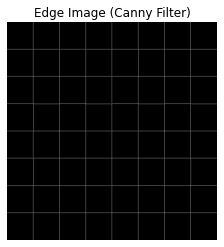

In [7]:
# Using a Canny Filter
imgResize = cv2.resize(img, (870, 901))
imgWithCannyFilter = cv2.Canny(imgResize, 100, 200) # used the default value for the sigma of the smoothing function

plt.imshow(imgWithCannyFilter, cmap="gray", vmin=0)
plt.title('Edge Image (Canny Filter)')
plt.axis('off')
plt.show()

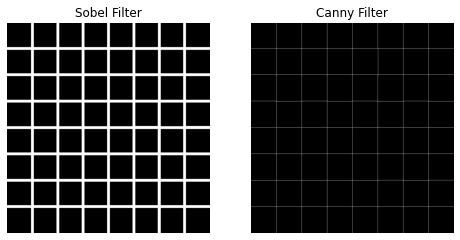

In [8]:
s = 7
t = 100

imgResize = cv2.resize(img, (870, 901))

# Apply a Gaussian blur filter before using the Sobel filter
imgBlur = cv2.GaussianBlur(imgResize, (s,s), 0) # Try with sizes 3x3, 7x7, 11x11, 31x31

# Using a Sobel Filter
imgWithSobelX = cv2.Sobel(imgBlur, cv2.CV_64F, 1, 0, ksize=s) # Also try with a kernel size of 1, 3, 7
imgWithSobelY = cv2.Sobel(imgBlur, cv2.CV_64F, 0, 1, ksize=s) # Also try with a kernel size of 1, 3, 7

abs_sobel_x = cv2.convertScaleAbs(imgWithSobelX)
abs_sobel_y = cv2.convertScaleAbs(imgWithSobelY)

grad = cv2.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)

_, sobelFilter = cv2.threshold(grad, t, 255, cv2.THRESH_BINARY)

# Using a Canny Filter
cannyFilter = cv2.Canny(imgResize, t, t, apertureSize=s)

fig, ax = plt.subplots(1,2,figsize=(8,6))

ax[0].imshow(sobelFilter, cmap='gray', vmin=0)
ax[0].set_title('Sobel Filter')
ax[0].axis('off')

ax[1].imshow(cannyFilter, cmap = 'gray', vmin=0)
ax[1].set_title('Canny Filter')
ax[1].axis('off')

plt.show()

## Hough Line Transform

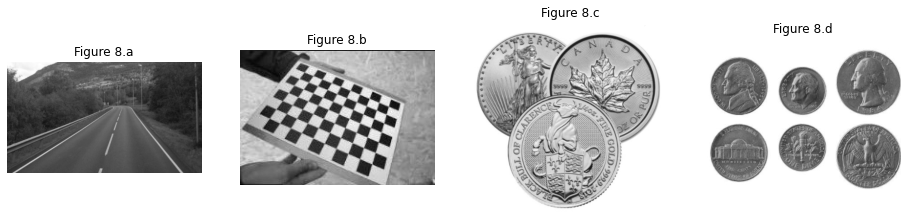

In [9]:
# Opening the images
img8a = cv2.imread(os.path.join(dataDir, 'streetLines_01.jpg'), 0)
img8b = cv2.imread(os.path.join(dataDir, 'chessboard_02.jpg'), 0)
img8c = cv2.imread(os.path.join(dataDir, 'coins_02.jpg'), 0)
img8d = cv2.imread(os.path.join(dataDir, 'coins_01.jpg'), 0)

fig, ax = plt.subplots(1,4,figsize=(16,12))

ax[0].imshow(img8a, cmap='gray', vmin=0)
ax[0].set_title('Figure 8.a')
ax[0].axis('off')

ax[1].imshow(img8b, cmap = 'gray', vmin=0)
ax[1].set_title('Figure 8.b')
ax[1].axis('off')

ax[2].imshow(img8c, cmap = 'gray', vmin=0)
ax[2].set_title('Figure 8.c')
ax[2].axis('off')

ax[3].imshow(img8d, cmap = 'gray', vmin=0)
ax[3].set_title('Figure 8.d')
ax[3].axis('off')

plt.show()

- The function `HoughLines()` finds lines in a binary image using the standard Hough transform.
- The function `HoughLinesP()` finds line segments in a binary image using the probabilistic Hough transform. This implementation is an optimized version of the standard Hough transform, and in this case, it’s less computationally intensive and executes faster.

[Standard Hough Lines Transform](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a)

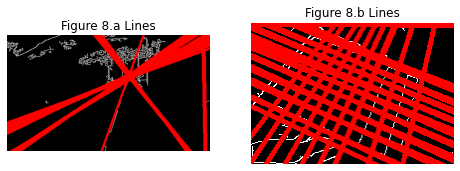

In [10]:
# Detect the edges of the input image, with a Canny Filter
img8aWithCanny = cv2.Canny(img8a, 50, 200) # used the default value for the sigma of the smoothing function
img8bWithCanny = cv2.Canny(img8b, 50, 200) # used the default value for the sigma of the smoothing function

# Copy edges to the image that will display the results in RGB (because of Matplotlib). Remember that OpenCV operates with BGR
img8aCopy = cv2.cvtColor(img8aWithCanny, cv2.COLOR_GRAY2RGB)
img8bCopy = cv2.cvtColor(img8bWithCanny, cv2.COLOR_GRAY2RGB)

# Apply the Hough transform (Standard Hough Lines Transform)
distanceResolution = 1
angleResolution = np.pi / 180

lines8a = cv2.HoughLines(img8aWithCanny, distanceResolution, angleResolution, 100, None, 0, 0)
lines8b = cv2.HoughLines(img8bWithCanny, distanceResolution, angleResolution, 60, None, 0, 0)

# Drawing the lines
def draw_lines(lines, copy):
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(copy, pt1, pt2, (255,0,0), 3)

draw_lines(lines8a, img8aCopy)
draw_lines(lines8b, img8bCopy)
    
fig, ax = plt.subplots(1,2,figsize=(8,6))

ax[0].imshow(img8aCopy)
ax[0].set_title('Figure 8.a Lines')
ax[0].axis('off')

ax[1].imshow(img8bCopy)
ax[1].set_title('Figure 8.b Lines')
ax[1].axis('off')

plt.show()

[Probabilistic Hough Lines Transform](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga8618180a5948286384e3b7ca02f6feeb)

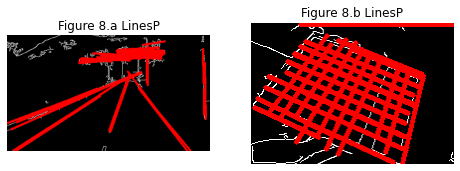

In [11]:
# Copy edges to the image that will display the results
img8aCopyP = cv2.cvtColor(img8aWithCanny, cv2.COLOR_GRAY2RGB)
img8bCopyP = cv2.cvtColor(img8bWithCanny, cv2.COLOR_GRAY2RGB)

# Apply the Hough transform (Probabilistic Hough Lines Transform)
distanceResolution = 1
angleResolution = np.pi / 180

lines8aP = cv2.HoughLinesP(img8aWithCanny, distanceResolution, angleResolution, 50, None, 50, 10)
lines8bP = cv2.HoughLinesP(img8bWithCanny, distanceResolution, angleResolution, 50, None, 50, 10)

# Drawing the lines
def draw_linesP(linesP, copy):
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(copy, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3)

draw_linesP(lines8aP, img8aCopyP)
draw_linesP(lines8bP, img8bCopyP)
    
fig, ax = plt.subplots(1,2,figsize=(8,6))

ax[0].imshow(img8aCopyP)
ax[0].set_title('Figure 8.a LinesP')
ax[0].axis('off')

ax[1].imshow(img8bCopyP)
ax[1].set_title('Figure 8.b LinesP')
ax[1].axis('off')

plt.show()

## Hough Circle Transform

[Hough Circle Transform](https://docs.opencv.org/master/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d)

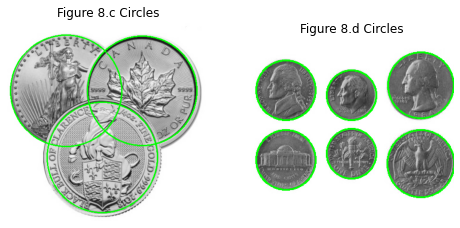

In [12]:
# Opening the images
img8c = cv2.imread(os.path.join(dataDir, 'coins_02.jpg'), 0)
img8d = cv2.imread(os.path.join(dataDir, 'coins_01.jpg'), 0)

img8cBlur = cv2.blur(img8c,(3,3))
img8dBlur = cv2.blur(img8d,(3,3))

# Copy edges to the image that will display the results
img8cCopy = cv2.cvtColor(img8c,cv2.COLOR_GRAY2RGB)
img8dCopy = cv2.cvtColor(img8d,cv2.COLOR_GRAY2RGB)

# Apply the Hough circle transform
detectionMethod = cv2.HOUGH_GRADIENT # corresponds to the Canny filter
resolutionFlag = 1 # same resolution as the original image
minDistance = 20 # between the centers of the detected circles

# param1 and param2 are the thresholds passed to the detection method 
circles8c = cv2.HoughCircles(img8cBlur, detectionMethod, resolutionFlag, minDistance, param1=200, param2=100, minRadius=100, maxRadius=0)
circles8c = np.uint16(np.around(circles8c))
circles8d = cv2.HoughCircles(img8dBlur, detectionMethod, resolutionFlag, minDistance, param1=200, param2=80, minRadius=0, maxRadius=0)
circles8d = np.uint16(np.around(circles8d))

# Drawing the resulting circles
def draw_circles(circles, copy):
    for i in circles[0,:]:
        cv2.circle(copy,(i[0],i[1]),i[2],(0,255,0),2)
        
draw_circles(circles8c, img8cCopy)
draw_circles(circles8d, img8dCopy)

fig, ax = plt.subplots(1,2,figsize=(8,6))

ax[0].imshow(img8cCopy)
ax[0].set_title('Figure 8.c Circles')
ax[0].axis('off')

ax[1].imshow(img8dCopy)
ax[1].set_title('Figure 8.d Circles')
ax[1].axis('off')

plt.show()